In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import eazy
from glob import glob
print('EAZYCODE = ' + os.getenv('EAZYCODE'))

EAZYCODE = /Users/Vince.ec/python_git_downloads/eazy-py/eazy-photoz/


In [2]:
import warnings
from astropy.utils.exceptions import AstropyWarning

np.seterr(all = 'ignore')
warnings.simplefilter('ignore', category=AstropyWarning)

In [12]:
params={}

params['VERBOSITY']                 =1.0
params['FILTERS_RES']               =os.getenv('EAZYCODE') + 'filters/FILTER.RES.latest'
params['FILTER_FORMAT']             =1.0
params['SMOOTH_FILTERS']            ='n'
params['SMOOTH_SIGMA']              =100.0
params['TEMPLATES_FILE']            =os.getenv('EAZYCODE') + 'templates/fsps_full/tweak_fsps_QSF_12_v3.param'
params['TEMPLATE_COMBOS']           ='a'
params['NMF_TOLERANCE']             =0.0001
params['WAVELENGTH_FILE']           =os.getenv('EAZYCODE') + 'templates/uvista_nmf/lambda.def'
params['TEMP_ERR_FILE']             =os.getenv('EAZYCODE') + 'templates/uvista_nmf/template_error_10.def'
params['TEMP_ERR_A2']               =0.5
params['SYS_ERR']                   =0.02
params['APPLY_IGM']                 ='y'
params['SCALE_2175_BUMP']           =0.0
params['MW_EBV']                    =0.0103
params['CAT_HAS_EXTCORR']           ='y'
params['DUMP_TEMPLATE_CACHE']       ='n'
params['USE_TEMPLATE_CACHE']        ='n'
params['CACHE_FILE']                ='photz.tempfilt'
params['CATALOG_FILE']              ='/Volumes/Vince_CLEAR/3dhst_V4.4/goodsn_3dhst.v4.4.cats/Catalog/goodsn_3dhst.v4.4.cat'
params['MAGNITUDES']                ='n'
params['NOT_OBS_THRESHOLD']         =-90.0
params['N_MIN_COLORS']              =5.0
params['OUTPUT_DIRECTORY']          ='/Volumes/Vince_CLEAR/eazy_test/'
params['MAIN_OUTPUT_FILE']          ='/Volumes/Vince_CLEAR/eazy_test/goodsn_3dhst.v4.4'
params['PRINT_ERRORS']              ='y'
params['CHI2_SCALE']                =1.0
params['VERBOSE_LOG']               ='y'
params['OBS_SED_FILE']              ='n'
params['TEMP_SED_FILE']             ='n'
params['POFZ_FILE']                 ='n'
params['BINARY_OUTPUT']             ='y'
params['APPLY_PRIOR']               ='y'
params['PRIOR_FILE']                =os.getenv('EAZYCODE') + 'templates/prior_F160W_TAO.dat'
params['PRIOR_FILTER']              =205
params['PRIOR_ABZP']                =25.0
params['PRIOR_FLOOR']               =0.01
params['FIX_ZSPEC']                 =False
params['Z_MIN']                     =0.01
params['Z_MAX']                     =6.0
params['Z_STEP']                    =0.01
params['Z_STEP_TYPE']               =1.0
params['GET_ZP_OFFSETS']            ='n'
params['ZP_OFFSET_TOL']             =0.0001
params['REST_FILTERS']              ='---'
params['RF_PADDING']                =1000.0
params['RF_ERRORS']                 ='n'
params['Z_COLUMN']                  ='z_peak'
params['USE_ZSPEC_FOR_REST']        ='y'
params['READ_ZBIN']                 ='n'
params['H0']                        =70.0
params['OMEGA_M']                   =0.3
params['OMEGA_L']                   =0.7

In [13]:
translate_file = '/Volumes/Vince_CLEAR/3dhst_V4.4/goodsn_3dhst.v4.4.cats/Eazy/goodsn_3dhst.v4.4.zphot.translate'

os.chdir(os.getenv('EAZYCODE'))

self = eazy.photoz.PhotoZ(param_file=None, translate_file=translate_file, zeropoint_file=None, 
                          params=params, load_prior=True, load_products=False)



Read default param file: /Users/Vince.ec/miniconda3/envs/astroconda/lib/python3.5/site-packages/eazy/data/zphot.param.default
Read CATALOG_FILE: /Volumes/Vince_CLEAR/3dhst_V4.4/goodsn_3dhst.v4.4.cats/Catalog/goodsn_3dhst.v4.4.cat
f_F160W e_F160W (205): hst/wfc3/IR/f160w.dat
f_U e_U (227): NOAO/k1001bp_jul04.txt
f_F435W e_F435W (233): hst/ACS_update_sep07/wfc_f435w_t81.dat
f_G e_G (229): LRIS/g_blue_transmission.dat
f_F606W e_F606W (236): hst/ACS_update_sep07/wfc_f606w_t81.dat
f_Rs e_Rs (231): LRIS/Rs_LRISred_transmission.dat
f_F775W e_F775W (238): hst/ACS_update_sep07/wfc_f775w_t81.dat
f_F850LP e_F850LP (240): hst/ACS_update_sep07/wfc_f850lp_t81.dat
f_F125W e_F125W (203): hst/wfc3/IR/f125w.dat
f_J e_J (224): MOIRCS/J277.txt
f_F140W e_F140W (204): hst/wfc3/IR/f140w.dat
f_H e_H (225): MOIRCS/H117.txt
f_Ks e_Ks (226): MOIRCS/Ks_rot1707wedged120K.txt
f_IRAC1 e_IRAC1 ( 18): IRAC/irac_tr1_2004-08-09.dat
f_IRAC2 e_IRAC2 ( 19): IRAC/irac_tr2_2004-08-09.dat
f_IRAC3 e_IRAC3 ( 20): IRAC/irac_tr3_

Iteration:  0
2476
Compute best fits
Fit 39.2 s (n_proc=8, NOBJ=2476)
Iteration:  1
2476
Compute best fits
Fit 36.8 s (n_proc=8, NOBJ=2476)
`error_residuals`: force uncertainties to match residuals
Iteration:  2
754
Compute best fits
Fit 12.6 s (n_proc=8, NOBJ=754)
`error_residuals`: force uncertainties to match residuals
Iteration:  3
577
Compute best fits
Fit 10.2 s (n_proc=8, NOBJ=577)
`error_residuals`: force uncertainties to match residuals
Iteration:  4
596
Compute best fits
Fit 10.5 s (n_proc=8, NOBJ=596)
`error_residuals`: force uncertainties to match residuals
Iteration:  5
599
Compute best fits
Fit 10.5 s (n_proc=8, NOBJ=599)
`error_residuals`: force uncertainties to match residuals
Iteration:  6
584
Compute best fits
Fit 10.3 s (n_proc=8, NOBJ=584)
`error_residuals`: force uncertainties to match residuals
Iteration:  7
585
Compute best fits
Fit 10.3 s (n_proc=8, NOBJ=585)
`error_residuals`: force uncertainties to match residuals
Iteration:  8
586
Compute best fits
Fit 11.9 s

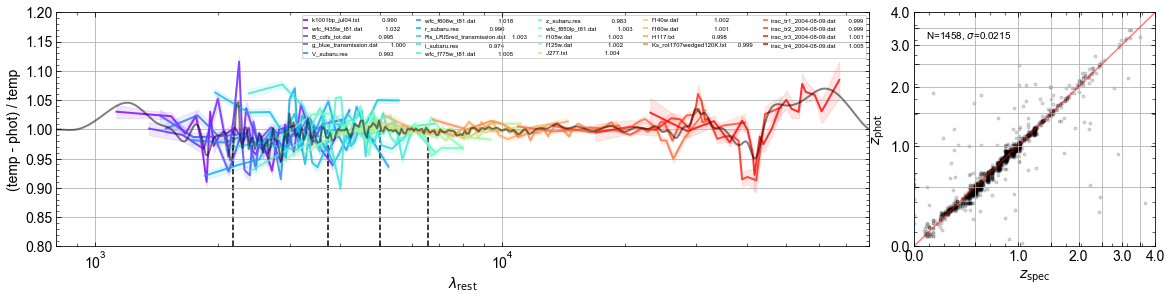

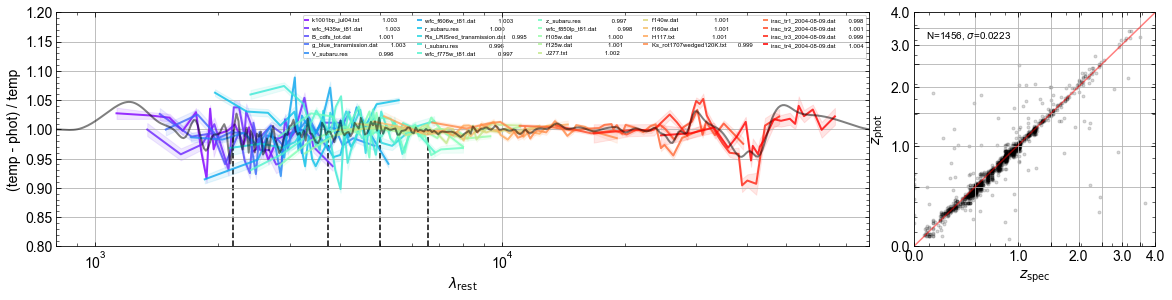

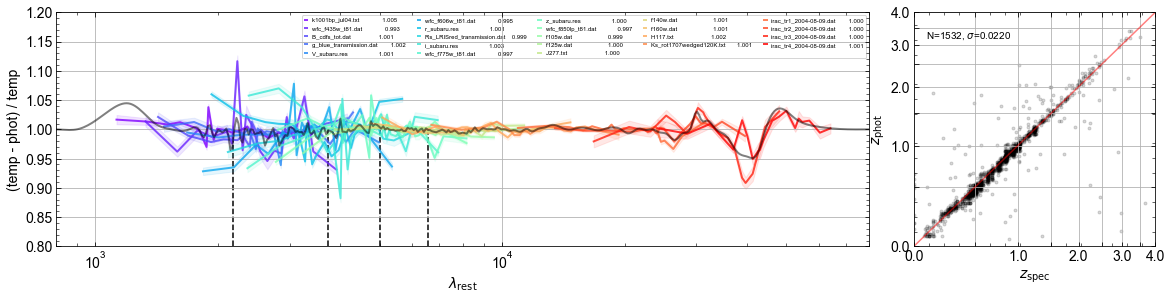

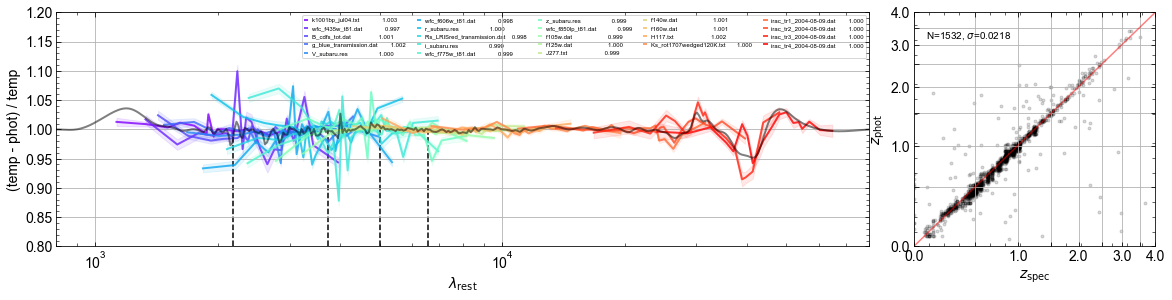

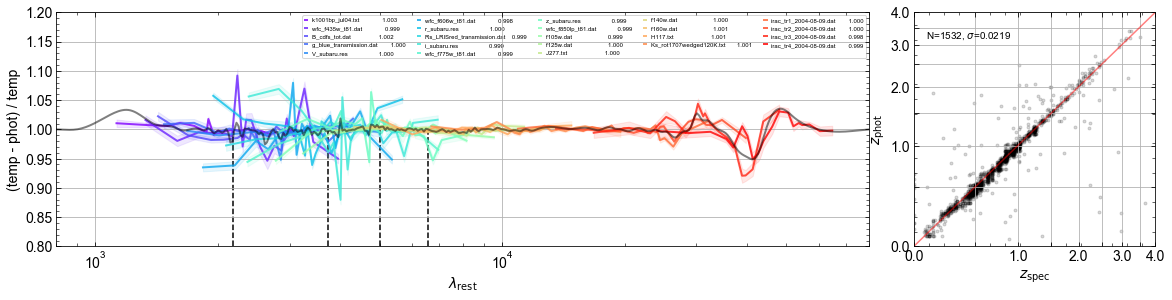

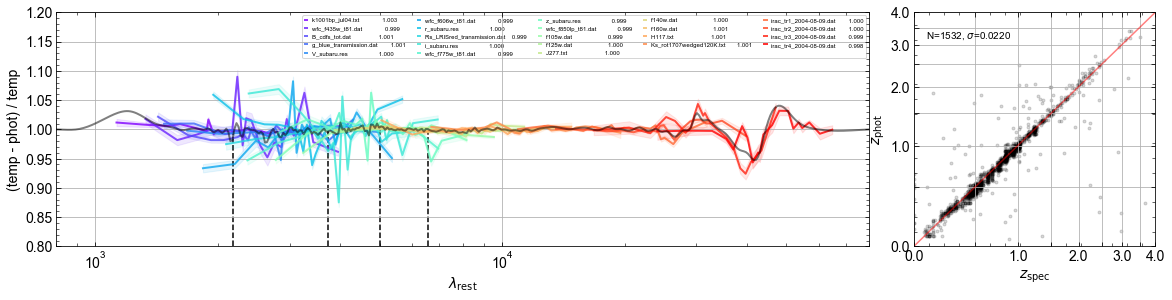

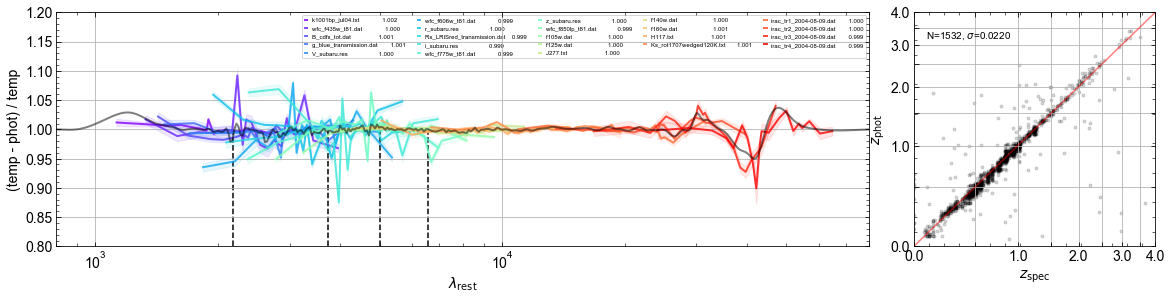

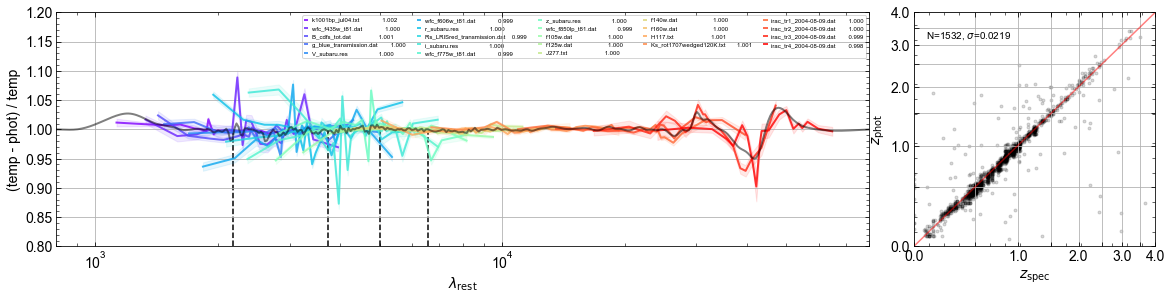

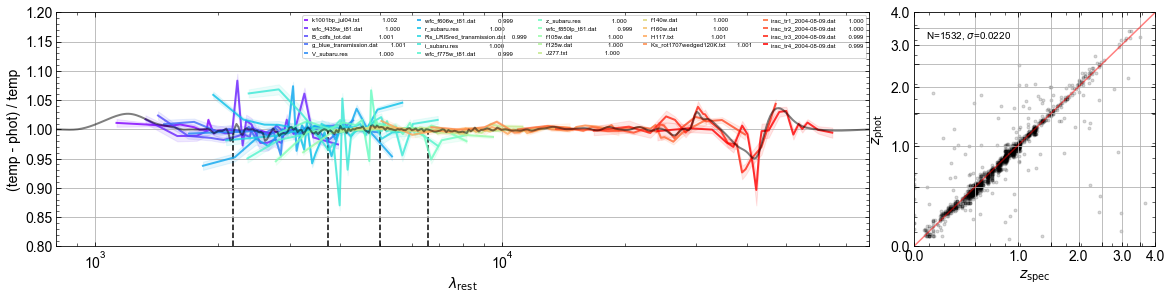

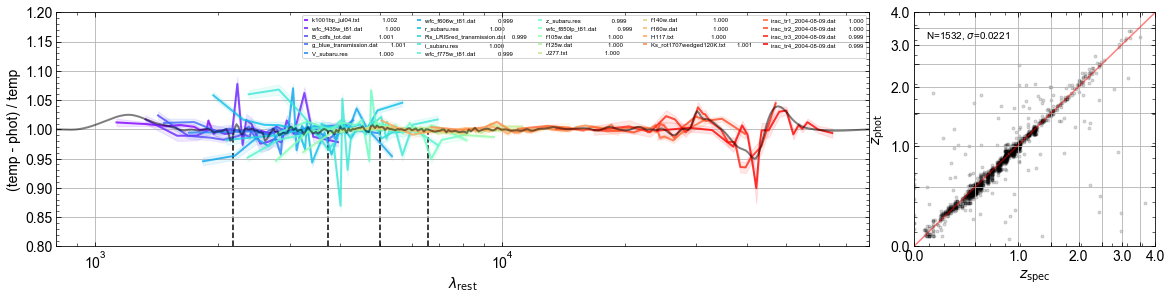

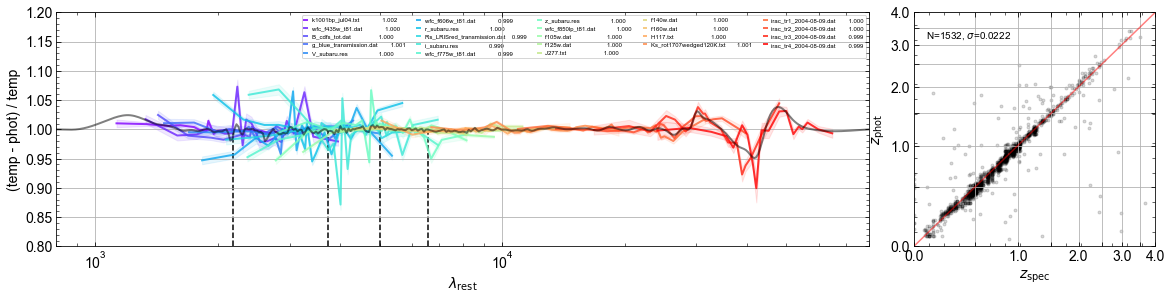

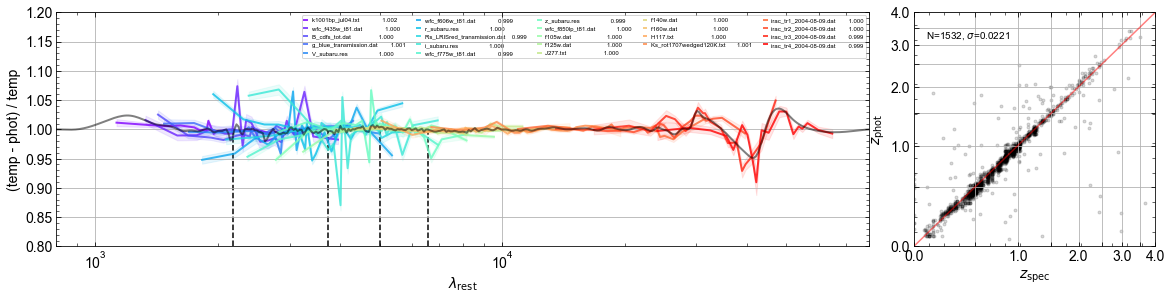

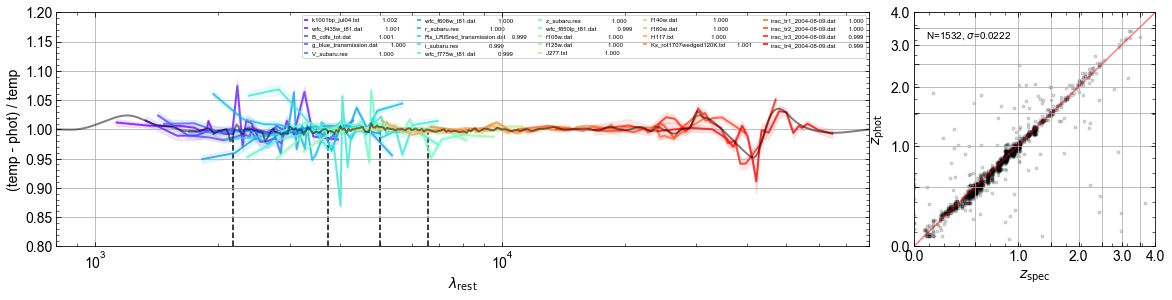

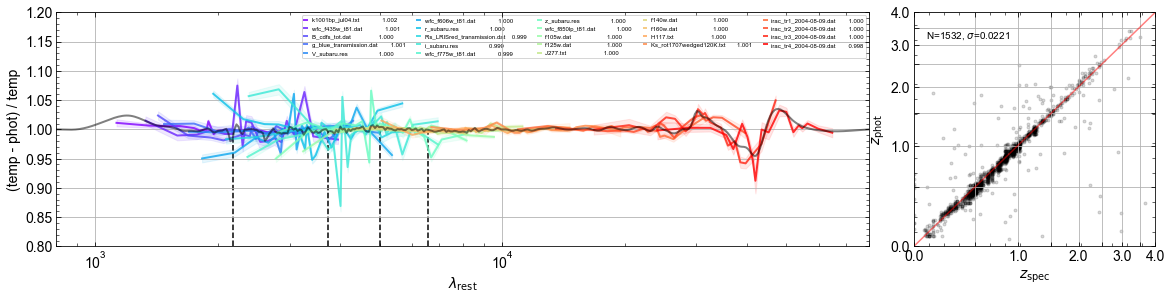

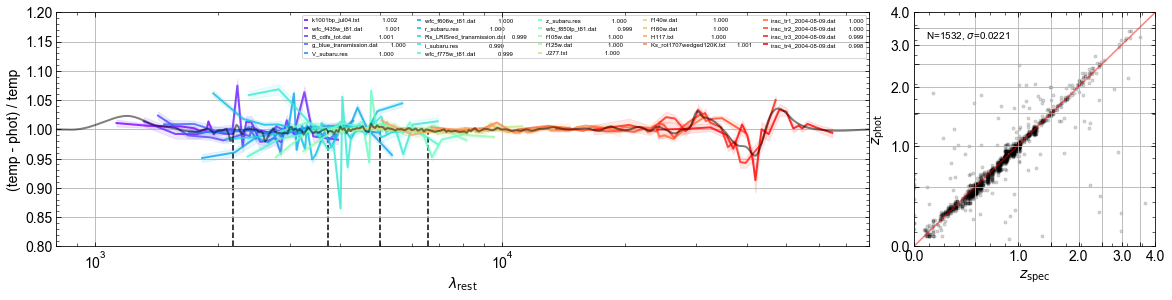

In [14]:
NITER = 15
NBIN = np.minimum(self.NOBJ//100, 180)

self.param.params['VERBOSITY'] = 1.
for iter in range(NITER):
    print('Iteration: ', iter)
    sn = self.fnu/self.efnu
    clip = (sn > 20).sum(axis=1) > 15 # Generally make this higher to ensure reasonable fits
#     clip = sn.T[-3] > 20
    
    print(len(np.where(clip == True)[0]))
    self.iterate_zp_templates(idx=self.idx[clip], update_templates=False, 
                              update_zeropoints=True, iter=iter, n_proc=8, 
                              save_templates=False, error_residuals=(iter > 0), 
                              NBIN=NBIN, get_spatial_offset=False)
    


Compute best fits
Fit 718.6 s (n_proc=8, NOBJ=50507)


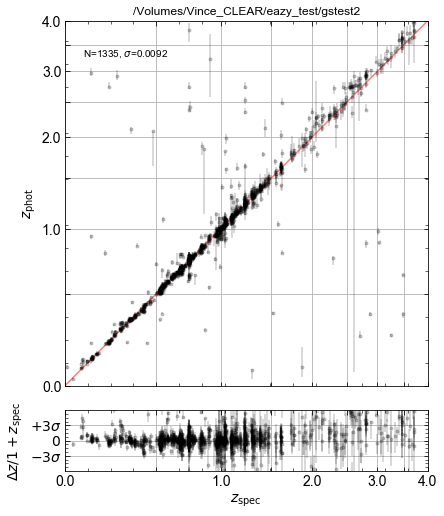

In [30]:

# Turn off error corrections derived above
self.efnu = self.efnu_orig*1

# Full catalog
sample = np.isfinite(self.cat['z_spec'])
self.fit_parallel(self.idx[sample], n_proc=8)
# Show zspec-zphot comparison
fig = self.zphot_zspec()


In [31]:
zout, hdu = self.standard_output(rf_pad_width=0.5, rf_max_err=2, prior=True, beta_prior=True)


Get best fit coeffs & best redshifts
Get parameters (UBVJ=[153, 154, 155, 161], LIR=[8, 1000])
Rest-frame filters: [153, 154, 155, 161]


/Users/Vince.ec/miniconda3/envs/astroconda/lib/python3.5/site-packages/eazy/photoz.py:2280: RuntimeWarning: covariance is not positive-semidefinite.
  coeffs_draw[:, ok_temp] = np.random.multivariate_normal(coeffs_i[ok_temp], covar, size=get_err)


Rest-frame filters: [270, 274, 120, 121, 156, 157, 158, 159, 160, 161, 162, 163]


In [60]:
self.show_fit(self.cat['id'][21555], xlim=[0.2, 3], show_components=True)

AttributeError: 'PhotoZ' object has no attribute 'zbest'

In [29]:
fnu_i = np.squeeze(self.fnu[21155, :])*self.ext_redden*self.zp
efnu_i = np.squeeze(self.efnu[21155,:])*self.ext_redden*self.zp

fnu_factor = 10**(-0.4*(self.param['PRIOR_ABZP']+48.6))
flam_sed = 3.e18/self.lc**2/self.ext_corr


In [79]:
from spec_exam import Gen_spec

In [172]:
Gs = Gen_spec('GND', 21156, 1.253,
               g102_lims=[8300, 11500], g141_lims=[11100, 16500], mdl_err = True,
            phot_errterm = 0.03, decontam = True) 

cleaned


<ErrorbarContainer object of 3 artists>

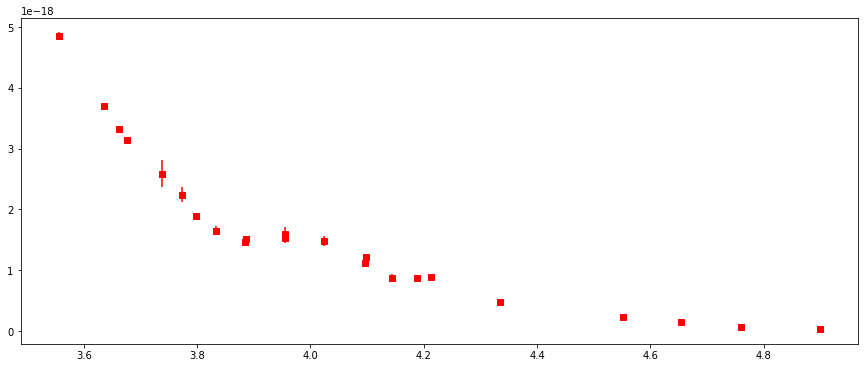

In [12]:
plt.figure(figsize = [15,6])

# plt.errorbar(np.log10(self.lc), (fnu_i*fnu_factor*flam_sed), (efnu_i*fnu_factor*flam_sed), color='k', marker='s', 
#              linestyle='None', label=None, zorder=10)
plt.errorbar(np.log10(pwv)[pfl > 0], pfl[pfl > 0], per[pfl > 0], color='r', marker='s', 
             linestyle='None', label=None, zorder=10)
# plt.errorbar(np.log10(Gs.Pwv)[Gs.Pflx > 0],Gs.Pflx[Gs.Pflx > 0],Gs.Perr[Gs.Pflx > 0],
#                                  linestyle='None', marker='p', color='#984ea3')

In [99]:
self.f_numbers

array([205, 227, 233, 229, 236, 231, 238, 240, 203, 224, 204, 225, 226,
        18,  19,  20,  21,  46, 115, 116, 117, 118, 202])

In [100]:
Gs.Pnum

array([205., 227., 233.,  46., 229., 115., 236., 116., 231., 117., 238.,
       118., 240., 203., 224., 204., 225., 226.,  18.,  19.,  20.,  21.,
       202.])

In [15]:
fnu_i = np.squeeze(self.fnu)*self.ext_redden*self.zp
efnu_i = np.squeeze(self.efnu)*self.ext_redden*self.zp

fnu_factor = 10**(-0.4*(self.param['PRIOR_ABZP']+48.6))
flam_sed = 3.e18/self.lc**2/self.ext_corr

nwv=self.lc
nfl=fnu_i*fnu_factor*flam_sed
ner=efnu_i*fnu_factor*flam_sed

In [16]:
def extract_phot(catalog, idx):

    Pwv = []
    Pfl = []
    Per = []
    Pnum = []
    
    for ii in range(len(catalog.f_numbers)):
        Pwv.append(nwv[ii])
        Pfl.append(nfl[idx - 1][ii])            
        Per.append(ner[idx - 1][ii])            
        Pnum.append(catalog.f_numbers[ii])
                
    return np.array([Pwv,Pfl,Per,Pnum])

In [17]:
pwv,pfl,per,pnum = extract_phot(self, 21156)

<ErrorbarContainer object of 3 artists>

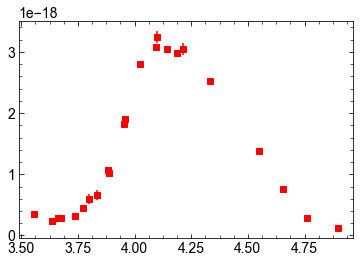

In [18]:
plt.errorbar(np.log10(pwv)[pfl > 0], pfl[pfl > 0], per[pfl > 0], color='r', marker='s', 
             linestyle='None', label=None, zorder=10)

In [19]:
os.chdir('/Users/Vince.ec/Github/Cluster_and_field/scripts/')
# GS_samp = pd.read_pickle('../dataframes/galaxy_frames/GS_cnd.pkl')
G_new = pd.read_pickle('../dataframes/galaxy_frames/GN_new.pkl')

In [20]:
G_new.id.values

array([11245, 11814, 12481, 12543, 12617, 12739, 13718, 13855, 13977,
       14132, 14140, 14970, 15616, 15981, 16180, 16231, 17735, 17746,
       18633, 19290, 19442, 20567, 21047, 21427, 21618, 21724, 21738,
       21896, 22027, 22184, 22210, 22358, 22463, 22571, 22600, 22633,
       22774, 23018, 23254, 23435, 24856, 24863, 24953, 26544, 27006,
       28890, 29879, 32146, 32566, 32691, 32933, 33093, 33780, 35469,
       35587, 35728, 35835, 36303, 36943, 37065, 37206, 37281, 37326,
       37343, 37765])

In [21]:
for i in range(len(G_new.id.values)):
    print(G_new.id.values[i])
    pwv,pfl,per,pnum = extract_phot(self, G_new.id.values[i])
    np.save('../phot/GND_{0}_phot.npy'.format(G_new.id.values[i]), [pwv,pfl,per,pnum])

11245
11814
12481
12543
12617
12739
13718
13855
13977
14132
14140
14970
15616
15981
16180
16231
17735
17746
18633
19290
19442
20567
21047
21427
21618
21724
21738
21896
22027
22184
22210
22358
22463
22571
22600
22633
22774
23018
23254
23435
24856
24863
24953
26544
27006
28890
29879
32146
32566
32691
32933
33093
33780
35469
35587
35728
35835
36303
36943
37065
37206
37281
37326
37343
37765
